# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [3]:
# Your code here: split the data into training and test sets
import pandas as pd

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1095, 3)
X_test shape: (365, 3)
y_train shape: (1095,)
y_test shape: (365,)


## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [4]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## Fit a Linear Regression on the Training Data

In [5]:
# Your code here: import the linear regression model class, initialize a model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

# One-hot encode the categorical predictor
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Display the model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 5.44292837e+01  2.04000490e+04 -3.23274589e+04 -4.50939675e+04
 -1.08458831e+04  3.56518718e+04  1.62620541e+04  1.38493356e+04
 -1.51662290e+04  3.10160949e+03 -2.75552255e+04 -1.77369559e+04
  4.21398323e+03 -2.25949061e+03 -1.30931679e+04 -1.38644330e+03
  6.24561731e+04  7.10894864e+04 -3.10122021e+04 -3.45371274e+04
  1.07767699e+03  2.88450983e+03  2.51533717e+04  7.08486047e+04
  3.30121348e+04  5.56526330e+04]
Model Intercept: -32966.424689112406


## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [6]:
# Your code here: generate predictions for both sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

# One-hot encode the categorical predictor
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Evaluate the model on the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print("Training Set Performance:")
print("R-squared:", train_r2)
print("Mean Squared Error:", train_mse)

print("\nTest Set Performance:")
print("R-squared:", test_r2)
print("Mean Squared Error:", test_mse)


Training Set Performance:
R-squared: 0.7768052939862685
Mean Squared Error: 1355114411.01234

Test Set Performance:
R-squared: 0.8082773992019393
Mean Squared Error: 1343076070.9086926


### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [7]:
# Your code here: calculate training and test MSE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

# One-hot encode the categorical predictor
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
test_mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print("Training Set Mean Squared Error:", train_mse)
print("Test Set Mean Squared Error:", test_mse)


Training Set Mean Squared Error: 1355114411.01234
Test Set Mean Squared Error: 1343076070.9086926


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

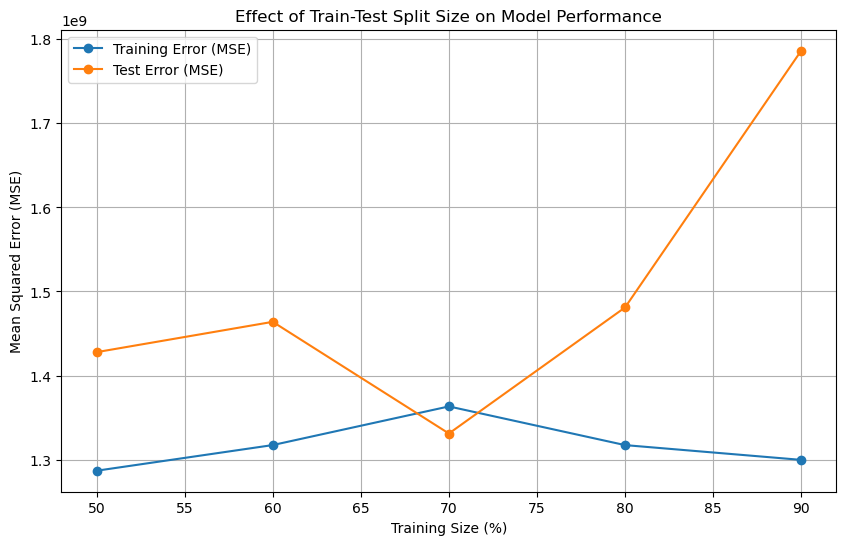

In [8]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
ames = pd.read_csv('ames.csv', index_col=0)

# Drop columns with any missing data
ames_cleaned = ames.dropna(axis=1)

# Select the predictors and the target variable
predictors = ['GrLivArea', 'OverallQual', 'Neighborhood']
target = 'SalePrice'

# Define the target variable
y = ames_cleaned[target]

# Define the features
X = ames_cleaned[predictors]

# One-hot encode the categorical predictor
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Define the range of train-test split sizes
split_sizes = np.arange(0.5, 1.0, 0.1)

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Iterate over the split sizes
for split_size in split_sizes:
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split_size, random_state=42)
    
    # Initialize the Linear Regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Generate predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Generate predictions on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE for the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    # Calculate MSE for the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Convert split sizes to training sizes (percentage of data used for training)
train_sizes = split_sizes * 100

# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error (MSE)', marker='o')
plt.plot(train_sizes, test_errors, label='Test Error (MSE)', marker='o')
plt.xlabel('Training Size (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Train-Test Split Size on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.